In [1]:
#BÀI trái cây

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = "/content/drive/MyDrive/traicay"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  


In [6]:
train_gen = train_data_gen.flow_from_directory(path, target_size=(50,50), class_mode='categorical')      


Found 300 images belonging to 10 classes.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(50,50,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(252,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                    

In [9]:
history = model.fit(train_gen,batch_size=128,epochs=50,verbose=1,validation_data=(train_gen))


Epoch 1/50
10/10 [==============================] - 82s 7s/step - loss: 2.9351 - accuracy: 0.0800 - val_loss: 2.2877 - val_accuracy: 0.1467
Epoch 2/50
10/10 [==============================] - 1s 133ms/step - loss: 2.2923 - accuracy: 0.1333 - val_loss: 2.2482 - val_accuracy: 0.1933
Epoch 3/50
10/10 [==============================] - 1s 136ms/step - loss: 2.1605 - accuracy: 0.1633 - val_loss: 2.0546 - val_accuracy: 0.2500
Epoch 4/50
10/10 [==============================] - 1s 136ms/step - loss: 1.9854 - accuracy: 0.2400 - val_loss: 1.7516 - val_accuracy: 0.3867
Epoch 5/50
10/10 [==============================] - 1s 135ms/step - loss: 1.7388 - accuracy: 0.3267 - val_loss: 1.6280 - val_accuracy: 0.3867
Epoch 6/50
10/10 [==============================] - 1s 133ms/step - loss: 1.6355 - accuracy: 0.3667 - val_loss: 1.5654 - val_accuracy: 0.4067
Epoch 7/50
10/10 [==============================] - 1s 133ms/step - loss: 1.4908 - accuracy: 0.4433 - val_loss: 1.2970 - val_accuracy: 0.4733
Epoch 8/

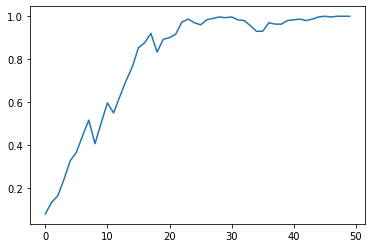

In [11]:
plt.plot(history.history['accuracy'])

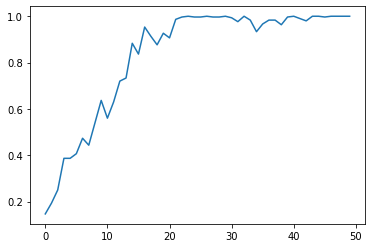

In [12]:
plt.plot(history.history['val_accuracy'])

In [13]:
model.save('traicay.h5')

kết quả dự đoán


'buởi'

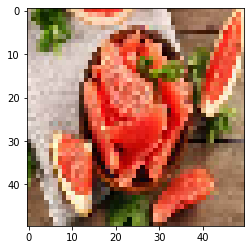

In [20]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model= load_model('traicay.h5')
from keras.preprocessing.image import load_img,img_to_array
#tạo dictionary
label= {0:'buởi',
         1:'cam',
         2:'dưagang',
         3:'dưa hấu',
         4:'mãng cầu',
         5:'măng cụt',
         6:'sầu riêng',
         7:'thanhlong',
         8:'vú sữa',
         9:'xoài'}
#load ảnh resize 50x50
img= load_img('8.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

label[int(np.argmax(model.predict(img),axis=1))]



kết quả dự đoán


'dưa hấu'

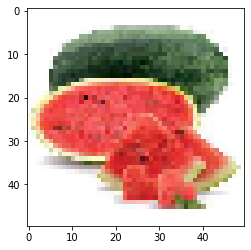

In [21]:
img= load_img('122.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')

label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'vú sữa'

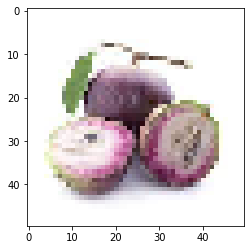

In [22]:
img= load_img('244.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]

kết quả dự đoán


'măng cụt'

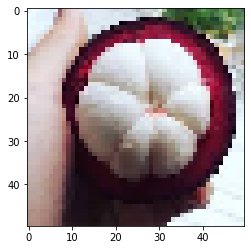

In [23]:
img= load_img('83.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]


kết quả dự đoán


'sầu riêng'

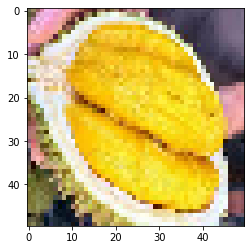

In [24]:
img= load_img('202.jpg',target_size=(50,50))
#show hình ảnh
plt.imshow(img)
img= img_to_array(img)


img= img.reshape(1,50,50,3)
#dự đoán kết quả
result= model.predict(img)
print('kết quả dự đoán')
label[int(np.argmax(model.predict(img),axis=1))]